In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1./255)


train_data = train_datagen.flow_from_directory('pizza_steak/train/',
                                   batch_size = 32,
                                  target_size=(224,224),
                                   class_mode='binary',
                                   seed=42)
test_datag = test_datagen.flow_from_directory('pizza_steak/test/',
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode='binary',
                                  seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D((2,2), strides=1),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2), strides=1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 221, 221, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 219, 219, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 218, 218, 32)      0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1520768)           0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [15]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])
history = model.fit(train_data, epochs=5)

Epoch 1/5
47/47 [==============================] - 35s 729ms/step - loss: 1.1856 - accuracy: 0.6153
Epoch 2/5
47/47 [==============================] - 35s 736ms/step - loss: 0.4264 - accuracy: 0.8147
Epoch 3/5
47/47 [==============================] - 35s 736ms/step - loss: 0.3213 - accuracy: 0.8653
Epoch 4/5
47/47 [==============================] - 35s 743ms/step - loss: 0.1403 - accuracy: 0.9433
Epoch 5/5
47/47 [==============================] - 35s 743ms/step - loss: 0.0477 - accuracy: 0.9900


In [16]:
model.predict(test_datag)

16/16 [==============================] - 3s 196ms/step


array([[9.07731950e-01],
       [4.00078110e-02],
       [9.99521554e-01],
       [3.89627367e-03],
       [1.94662921e-02],
       [9.99987483e-01],
       [7.97188520e-01],
       [2.09156021e-01],
       [7.00959086e-01],
       [5.36197901e-01],
       [2.49586151e-06],
       [1.04761876e-01],
       [3.08559060e-01],
       [1.84261298e-03],
       [9.98777926e-01],
       [9.99999285e-01],
       [8.91935706e-01],
       [8.56707897e-03],
       [9.61954534e-01],
       [9.80741560e-01],
       [2.29465328e-02],
       [8.47709998e-02],
       [1.07576720e-01],
       [7.48077273e-01],
       [2.68177555e-05],
       [9.98988569e-01],
       [9.96709704e-01],
       [6.19063936e-02],
       [6.28209964e-05],
       [9.98249412e-01],
       [9.99999881e-01],
       [1.77041456e-01],
       [9.99766111e-01],
       [6.67952059e-04],
       [1.05468251e-01],
       [9.74117398e-01],
       [3.90573829e-01],
       [9.43355322e-01],
       [1.47871370e-03],
       [1.33212461e-06],


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.6,
                                   shear_range = 0.7,
                                   zoom_range=0.5,
                                   horizontal_flip = True)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_data_augmented = train_datagen_augmented.flow_from_directory('pizza_steak/train/',
                                   batch_size = 32,
                                  target_size=(224,224),
                                   class_mode='binary',
                                   seed=42)
train_data = train_datagen.flow_from_directory("pizza_steak/train/",
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode='binary',
                                            seed=42)
test_data = test_datagen.flow_from_directory('pizza_steak/test/',
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode='binary',
                                  seed=42)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
img, label = train_data.next()
img_augmented, label_augmented = train_data_augmented.next()

In [19]:
img[0], img_augmented[0]

(array([[[0.42352945, 0.43137258, 0.34509805],
         [0.31764707, 0.3254902 , 0.2392157 ],
         [0.26666668, 0.28235295, 0.18431373],
         ...,
         [0.42352945, 0.34901962, 0.37254903],
         [0.427451  , 0.34901962, 0.39607847],
         [0.45098042, 0.36862746, 0.427451  ]],
 
        [[0.2901961 , 0.30588236, 0.21568629],
         [0.45882356, 0.47450984, 0.37647063],
         [0.2627451 , 0.28627452, 0.18431373],
         ...,
         [0.39607847, 0.34117648, 0.34117648],
         [0.4156863 , 0.36862746, 0.37647063],
         [0.39607847, 0.34901962, 0.3647059 ]],
 
        [[0.37254903, 0.39607847, 0.29411766],
         [0.39607847, 0.41960788, 0.31764707],
         [0.30588236, 0.34117648, 0.23529413],
         ...,
         [0.34509805, 0.3254902 , 0.3019608 ],
         [0.30980393, 0.29803923, 0.27058825],
         [0.3372549 , 0.3254902 , 0.30588236]],
 
        ...,
 
        [[0.5137255 , 0.5019608 , 0.54509807],
         [0.52156866, 0.50980395, 0.54509

In [21]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])
history = model.fit(train_data, epochs=5)

Epoch 1/5
47/47 [==============================] - 35s 733ms/step - loss: 0.0908 - accuracy: 0.9760
Epoch 2/5
47/47 [==============================] - 35s 746ms/step - loss: 0.0122 - accuracy: 0.9967
Epoch 3/5
47/47 [==============================] - 35s 740ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 4/5
47/47 [==============================] - 35s 745ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 5/5
47/47 [==============================] - 35s 744ms/step - loss: 7.9623e-04 - accuracy: 1.0000


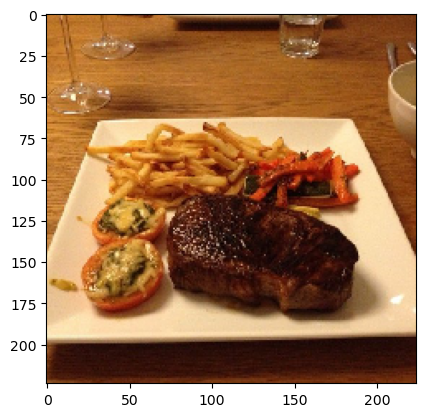

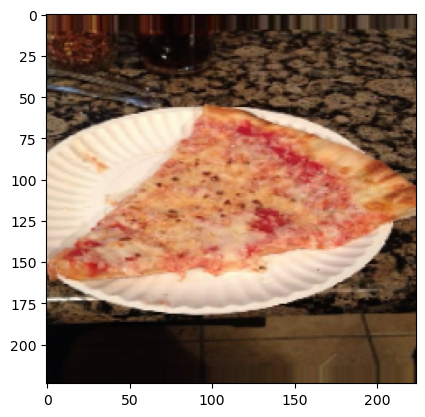

In [20]:
import matplotlib.pyplot as plt
plt.imshow(img[5])
plt.show()
plt.imshow(img_augmented[25])
plt.show()